# 📝 Exercise M5.01

In the previous notebook, we showed how a tree with a depth of 1 level was
working. The aim of this exercise is to repeat part of the previous
experiment for a depth with 2 levels to show how the process of partitioning
is repeated over time.

Before to start, we will:

* load the dataset;
* split the dataset into training and testing dataset;
* define the function to show the classification decision function.

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [2]:
from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)

Create a decision tree classifier with a maximum depth of 2 levels and fit
the training data. Once this classifier trained, plot the data and the
decision boundary to see the benefit of increasing the depth. To plot the
decision boundary, you should import the class `DecisionBoundaryDisplay`
from the module `helpers.plotting` as shown in the previous course notebook.

In [5]:
# Write your code here.
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)

tree.fit(data, target)

DecisionTreeClassifier(max_depth=2)

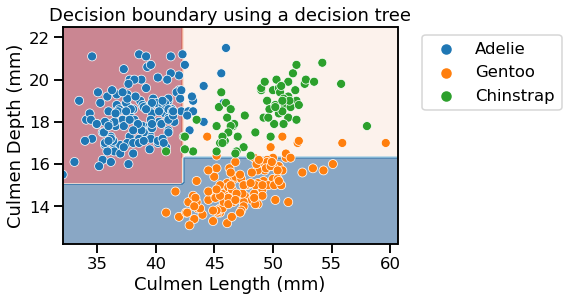

In [8]:
from helpers.plotting import DecisionBoundaryDisplay
import seaborn as sns
import matplotlib.pyplot as plt

DecisionBoundaryDisplay.from_estimator(
    tree, data_train, response_method="predict", cmap="RdBu", alpha=0.5
)
sns.scatterplot(data=penguins, x=culmen_columns[0], y=culmen_columns[1],
                hue=target_column)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Decision boundary using a decision tree")

Did we make use of the feature "Culmen Length"?
Plot the tree using the function `sklearn.tree.plot_tree` to find out!

[Text(0.5, 0.8333333333333334, 'Culmen Length (mm) <= 42.35\nsamples = 342\nvalue = [151, 68, 123]\nclass = Adelie'),
 Text(0.25, 0.5, 'Culmen Depth (mm) <= 15.1\nsamples = 143\nvalue = [139, 1, 3]\nclass = Adelie'),
 Text(0.125, 0.16666666666666666, 'samples = 3\nvalue = [0, 0, 3]\nclass = Gentoo'),
 Text(0.375, 0.16666666666666666, 'samples = 140\nvalue = [139, 1, 0]\nclass = Adelie'),
 Text(0.75, 0.5, 'Culmen Depth (mm) <= 16.35\nsamples = 199\nvalue = [12, 67, 120]\nclass = Gentoo'),
 Text(0.625, 0.16666666666666666, 'samples = 111\nvalue = [0, 0, 111]\nclass = Gentoo'),
 Text(0.875, 0.16666666666666666, 'samples = 88\nvalue = [12, 67, 9]\nclass = Chinstrap')]

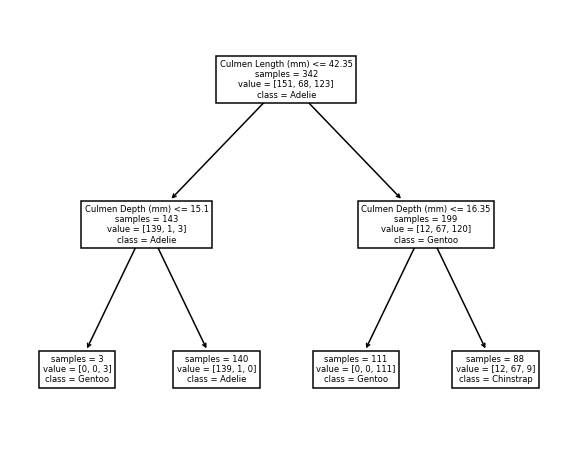

In [15]:
# Write your code here.
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(10, 8))
plot_tree(tree, feature_names=culmen_columns, 
    class_names=tree.classes_, impurity=False, ax=ax)

Compute the accuracy of the decision tree on the testing data.

(array([0.34883721, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 9.65116279]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

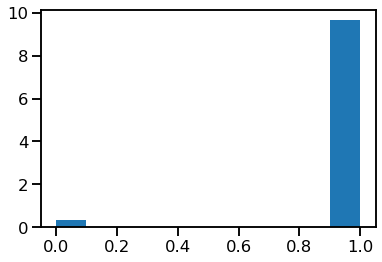

In [25]:
# Write your code here.
import numpy as np

predict_data = tree.predict(data_test)

plt.hist(np.array(predict_data == target_test, dtype=int), density=True)